<a href="https://colab.research.google.com/github/SESCDS/sescds/blob/master/Part%202/Lesson%206/Lesson6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from fastai import *
from fastai.vision import *

In [2]:
data_path = untar_data(URLs.CIFAR, dest = '/content/datasets/CIFAR')
data_path

PosixPath('/content/datasets/CIFAR/cifar10')

In [0]:
data = ImageDataBunch.from_folder(data_path, valid='test', bs=64).normalize()

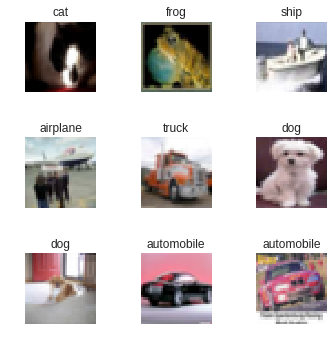

In [88]:
data.show_batch(3,figsize=(5,5))

In [0]:
def conv(ni,nf): 
  return nn.Conv2d(ni, nf, kernel_size=3, stride=2, padding=1)

model = nn.Sequential(
    conv(3, 8), # 16
    nn.BatchNorm2d(8),
    nn.ReLU(),
    conv(8, 16), # 8
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 32), # 4
    nn.BatchNorm2d(32),
    nn.ReLU(),
    conv(32, 16), # 2
    nn.BatchNorm2d(16),
    nn.ReLU(),
    conv(16, 10), # 1
    nn.BatchNorm2d(10),
    Flatten()     # убираем лишние измерения
)

In [0]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [39]:
print(learn.summary())

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [1, 8, 16, 16]       224        True      
______________________________________________________________________
BatchNorm2d          [1, 8, 16, 16]       16         True      
______________________________________________________________________
ReLU                 [1, 8, 16, 16]       0          False     
______________________________________________________________________
Conv2d               [1, 16, 8, 8]        1,168      True      
______________________________________________________________________
BatchNorm2d          [1, 16, 8, 8]        32         True      
______________________________________________________________________
ReLU                 [1, 16, 8, 8]        0          False     
______________________________________________________________________
Conv2d               [1, 32, 4, 4]        4,640      True      
______________________________________________________________

In [25]:
learn.lr_find(end_lr=100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


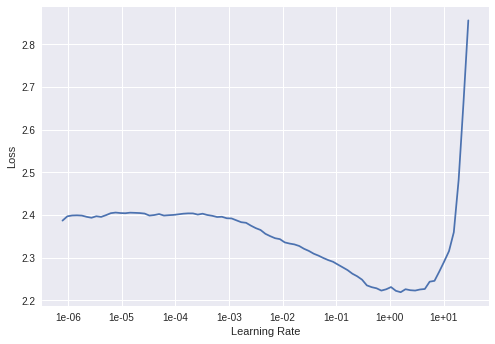

In [26]:
learn.recorder.plot()

In [27]:
learn.fit_one_cycle(5, max_lr=0.1)

epoch,train_loss,valid_loss,accuracy,time
0,1.470612,1.504840,0.457600,00:41
1,1.374570,1.376846,0.502300,00:41
2,1.231054,1.299504,0.538200,00:41
3,1.080055,1.109599,0.607700,00:41
4,1.032689,1.030174,0.637000,00:41


In [0]:
class ConvNet(nn.Module):
    def __init__(self, num_classes=10):
        super(ConvNet, self).__init__()
        
        self.layer1 = nn.Sequential(
            nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(16),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.layer2 = nn.Sequential(
            nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1),
            nn.BatchNorm2d(32),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2))
        
        self.fc = nn.Linear(8*8*32, num_classes)
        
    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = out.reshape(out.size(0), -1)
        out = self.fc(out)
        return out

In [0]:
model = ConvNet()
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [91]:
print(learn.summary())

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [1, 16, 32, 32]      448        True      
______________________________________________________________________
BatchNorm2d          [1, 16, 32, 32]      32         True      
______________________________________________________________________
ReLU                 [1, 16, 32, 32]      0          False     
______________________________________________________________________
MaxPool2d            [1, 16, 16, 16]      0          False     
______________________________________________________________________
Conv2d               [1, 32, 16, 16]      4,640      True      
______________________________________________________________________
BatchNorm2d          [1, 32, 16, 16]      64         True      
______________________________________________________________________
ReLU                 [1, 32, 16, 16]      0          False     
______________________________________________________________

In [92]:
learn.lr_find(end_lr=100)

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


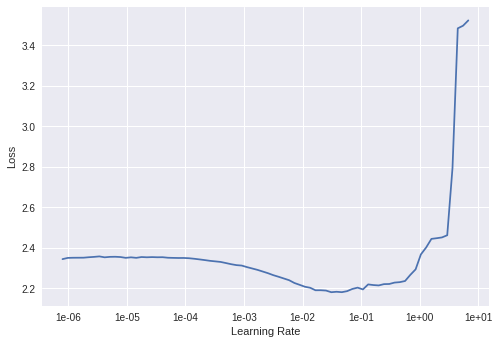

In [93]:
learn.recorder.plot()

In [94]:
learn.fit_one_cycle(10, max_lr=5e-3)

epoch,train_loss,valid_loss,accuracy,time
0,1.258502,1.178780,0.586400,00:34
1,1.096960,1.147171,0.603400,00:34
2,0.942385,0.983576,0.656500,00:34
3,0.890214,0.933684,0.677500,00:34
4,0.815004,0.906431,0.687200,00:34
5,0.737424,0.873962,0.705200,00:34
6,0.674543,0.855973,0.712600,00:34
7,0.620903,0.816729,0.729100,00:34
8,0.572785,0.810711,0.731200,00:34
9,0.530959,0.807534,0.731400,00:34


In [0]:
def conv_block(ni, nf):
  return nn.Sequential(
            conv(ni,nf),
            nn.BatchNorm2d(nf),
            nn.ReLU())

In [0]:
model = nn.Sequential(
    conv_block(3, 16), # 16
    conv_block(16, 32), # 8
    conv_block(32, 64), # 4
    conv_block(64, 32), # 2
    conv_block(32, 16),
    Flatten(),     # remove (1,1) grid
    nn.Linear(16, 10)
)

In [0]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [59]:
learn.summary()

Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [1, 16, 16, 16]      448        True      
______________________________________________________________________
BatchNorm2d          [1, 16, 16, 16]      32         True      
______________________________________________________________________
ReLU                 [1, 16, 16, 16]      0          False     
______________________________________________________________________
Conv2d               [1, 32, 8, 8]        4,640      True      
______________________________________________________________________
BatchNorm2d          [1, 32, 8, 8]        64         True      
______________________________________________________________________
ReLU                 [1, 32, 8, 8]        0          False     
______________________________________________________________________
Conv2d               [1, 64, 4, 4]        18,496     True      
______________________________________________________________

In [60]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


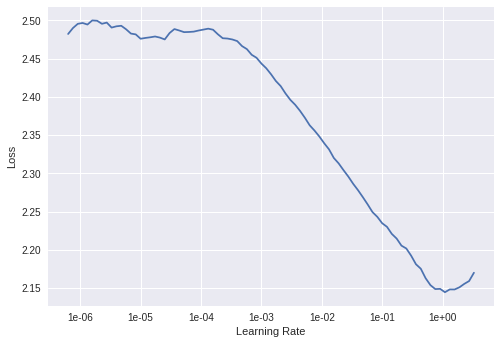

In [54]:
learn.recorder.plot()

Проблема с глубокими сетями:

![alt text](https://github.com/hiromis/notes/blob/master/lesson7/7.png?raw=true)

In [0]:
class ResBlock(nn.Module):
    def __init__(self, nf):
        super().__init__()
        self.conv1 = conv_layer(nf,nf)
        self.conv2 = conv_layer(nf,nf)
        
    def forward(self, x): return x + self.conv2(self.conv1(x))

![alt text](https://github.com/hiromis/notes/blob/master/lesson7/9.png?raw=true)

In [0]:
def conv2(ni,nf): return conv_layer(ni,nf,stride=2)

In [0]:
model = nn.Sequential(
    conv2(3, 8),
    res_block(8),
    conv2(8, 16),
    res_block(16),
    conv2(16, 32),
    res_block(32),
    conv2(32, 16),
    res_block(16),
    conv2(16, 10),
    Flatten()
)

In [0]:
learn = Learner(data, model, loss_func = nn.CrossEntropyLoss(), metrics=accuracy)

In [0]:
learn.summary()

In [106]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


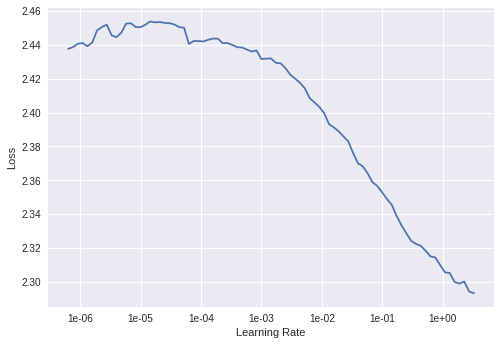

In [107]:
learn.recorder.plot()

In [108]:
learn.fit_one_cycle(10, max_lr=0.05)

epoch,train_loss,valid_loss,accuracy,time
0,1.486911,1.538661,0.442200,00:43
1,1.330096,1.409959,0.493400,00:45
2,1.198822,1.314081,0.532200,00:45
3,1.098328,1.114388,0.602700,00:45
4,1.016127,0.975775,0.659800,00:45
5,0.935069,1.046803,0.634000,00:44
6,0.833446,0.856309,0.698900,00:44
7,0.728872,0.813988,0.721200,00:43
8,0.636454,0.785621,0.729600,00:39
9,0.551241,0.786466,0.730800,00:40
